In this notebook, we will build a 3D map of a scene from a small set of images and then localize an image downloaded from the Internet. This demo was contributed by [Philipp Lindenberger](https://github.com/Phil26AT/).

In [1]:
%load_ext autoreload
%autoreload 2
import tqdm, tqdm.notebook
tqdm.tqdm = tqdm.notebook.tqdm  # notebook-friendly progress bars
from pathlib import Path
import numpy as np

from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_exhaustive
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d

# Setup
Here we define some output paths.

In [2]:
images = Path('datasets/test_crop')
outputs = Path('outputs/demo/')
# !rm -rf $outputs
sfm_pairs = outputs / 'pairs-sfm.txt'
loc_pairs = outputs / 'pairs-loc.txt'
sfm_dir = outputs / 'sfm'
features = outputs / 'features.h5'
matches = outputs / 'matches.h5'

3 mapping images


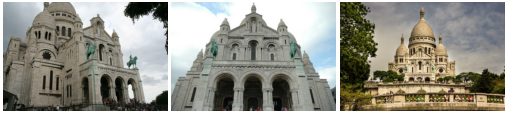

In [3]:
references = [p.relative_to(images).as_posix() for p in (images).iterdir()]
print(len(references), "mapping images")
plot_images([read_image(images / r) for r in references], dpi=25)

Then we extract features and match them across image pairs. Since we deal with few images, we simply match all pairs exhaustively. For larger scenes, we would use image retrieval, as demonstrated in the other notebooks.

In [4]:
feature_conf = extract_features.confs['roma']
extract_features.main(feature_conf, images, image_list=references, feature_path=features)

pairs_from_exhaustive.main(sfm_pairs, image_list=references)

[2025/11/04 14:22:08 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 100, 'name': 'roma'},
 'output': 'feats-roma',
 'preprocessing': {'grayscale': False,
                   'patch_size': 14,
                   'resize_max': 280,
                   'size_roma': True}}
[2025/11/04 14:22:08 hloc INFO] Skipping the extraction.
[2025/11/04 14:22:08 hloc INFO] Found 3 pairs.


In [6]:
matcher_conf = match_features.confs['roma']
match_features.main(matcher_conf, sfm_pairs, features=features, matches=matches)

[2025/11/04 15:18:48 hloc INFO] Matching local features with configuration:
{'model': {'max_keypoints': 100, 'name': 'roma', 'weight_mode': 'outdoor'},
 'output': 'matches-roma'}


  0%|          | 0/3 [00:00<?, ?it/s]

2025-11-04 15:19:06.536 | INFO     | third_party.RoMa.romatch.models.model_zoo.roma_models:roma_model:61 - Using coarse resolution (182, 280), and upsample res (336, 506)


: 